Matplotlib Library Tutorial
=====================

Library for graphing plotting. Classically import its pyplot library as follows.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

**pyplot has 2 different APIs that can be used:** the global API and the OOP API.

* The global API is the default original matplotlib designed based on MATLAB with a MATLAB-style interface. Most tutorials, stackoverflow, etc. will refer to global API.

* OOP API is a bit more familiar to programmers in Python, an OOP language.

Global API (MATLAB-styled)
----------------------------------------

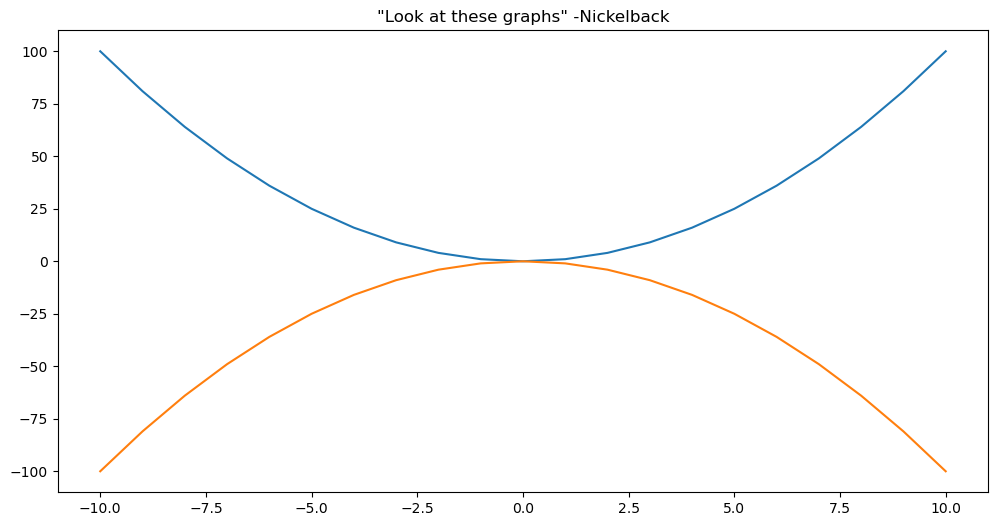

In [2]:
x = np.arange(-10, 11)

plt.figure(figsize=(12, 6))
plt.title('"Look at these graphs" -Nickelback')

plt.plot(x, x**2)  # f(x) = x**2
plt.plot(x, -1 * (x**2))  # f(x) = -1 * (x**2)

`plt.figure()`, `plt.title()`, & `plt.plot()` are *functions*, not methods from the pyplot.py module, and the values are above are assigned to the module's *variables*, not attributes. Because these are essentially global variables, this is called the "global" API, and honestly should be burned in a lake of fire for lack of OOP. 

Text(0, 0.5, 'X Squared')

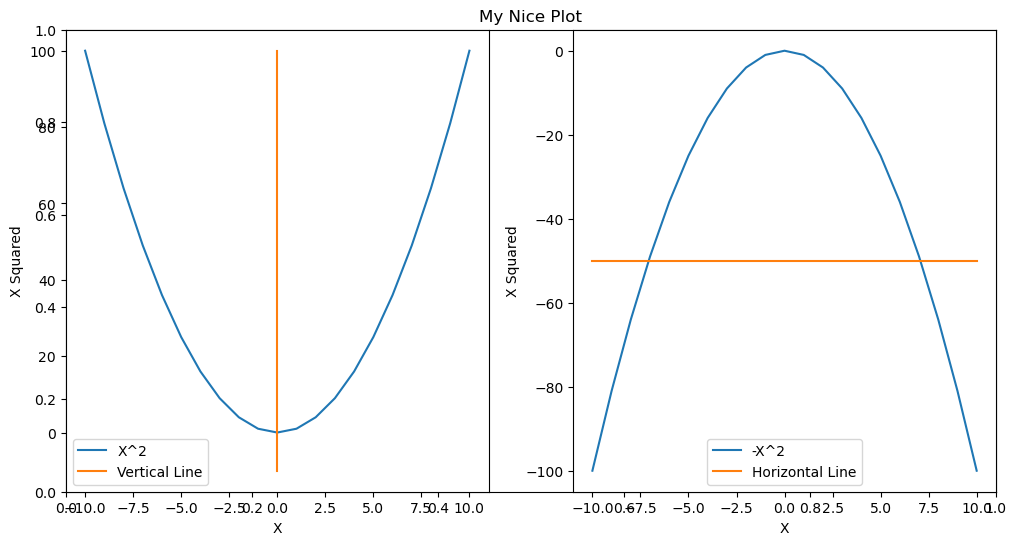

In [3]:
plt.figure(figsize=(12, 6))  # all subsequent plt.plot() calls refer to this plt.figure()
plt.title('My Nice Plot')

# 1st graph, created as a subplot
plt.subplot(1, 2, 1)  # rows, columns, panel selected
plt.plot(x, x ** 2)
plt.plot([0, 0, 0], [-10, 0, 100])
plt.legend(['X^2', 'Vertical Line'])
plt.xlabel('X')
plt.ylabel('X Squared')

# 2nd graph, created as a subplot
plt.subplot(1, 2, 2)  # changes subsequent lines to plot on 2nd subplot
plt.plot(x, -1 * (x ** 2))
plt.plot([-10, 0, 10], [-50, -50, -50])
plt.legend(['-X^2', 'Horizontal Line'])

plt.xlabel('X')
plt.ylabel('X Squared')

Instead of creating each graph as a different object (e.g. `x_sq = plt.plot(x, x**2)` & `neg_x_sq = plt.plot(x, -1 * (x**2)`), these heathens have only 1 `plt.plot()` variable, so "subplots" need to exist. The issue here is that the line of code above to create a horizontal line on 2nd subplot (`plt.plot([-10, 0, 10], [-50, -50, -50])`) would have created a horizontal line on the 1st subplot if that line of code was called in the upper block, prior to having called `plt.subplot(1, 2, 2)`to initiate drawing of the 2nd subplot.

All code written in global API format can only be understood by reading in a top-down format. Coming back to old code much later (or as an outsider) is very difficult because you can't jump into the middle; the middle code only makes sense in the context of the preceding code.

**Despicable.**

OOP API
------------

What was previously called a plot is now called a figure. What was previously called a subplot is now called an axis.

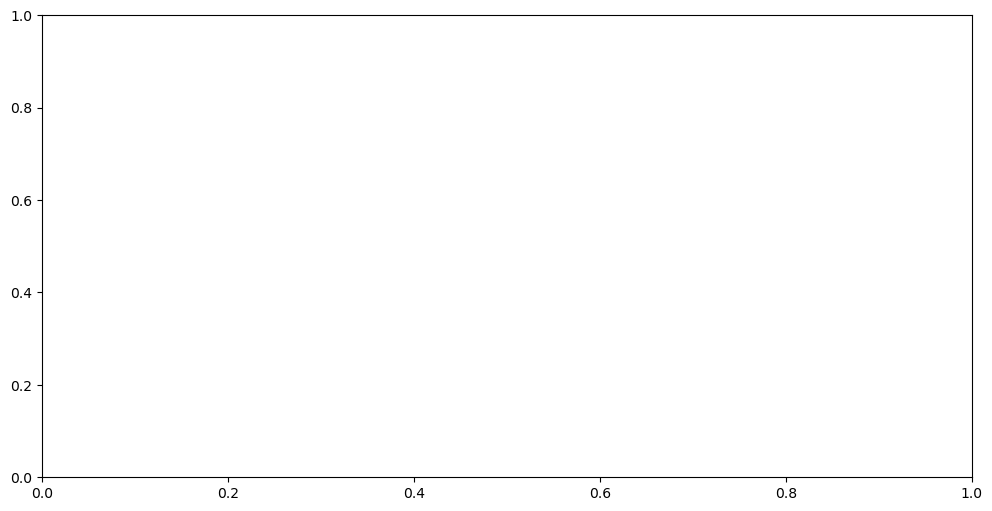

In [4]:
fig, axes = plt.subplots(figsize=(12, 6))  # create a 1-axis figure

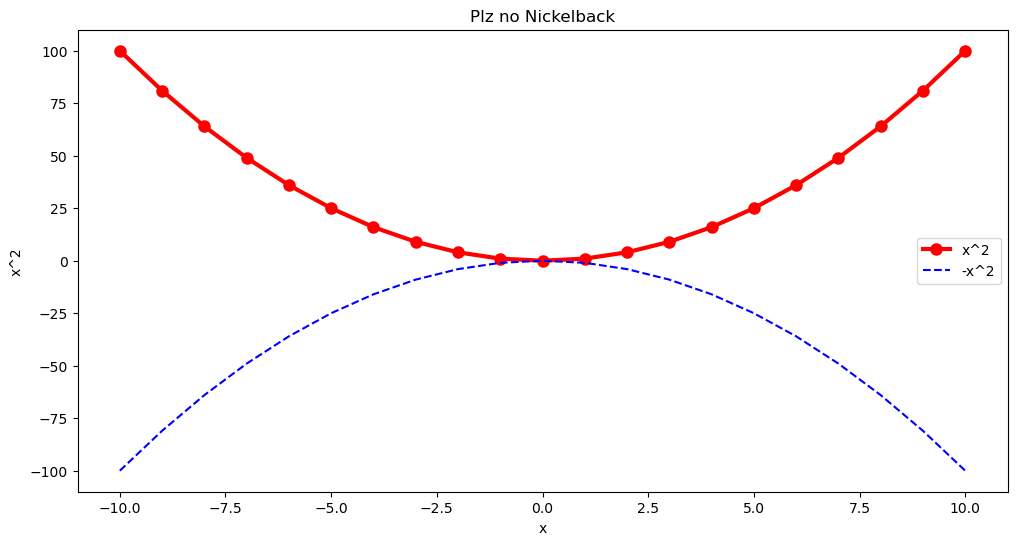

In [5]:
# create a 1-axis figure
(fig, axes) = plt.subplots(figsize=(12, 6))  # plt.subplots takes a (figure, axis) tuple, and kwargs (e.g. figure size)

# plot x^2 in red
axes.plot(
    x, x**2,
    color='red', linewidth=3,
    marker='o', markersize=8,
    label='x^2'
)

# plot -(x^2) in dashed blue
axes.plot(
    x, -1 * (x**2),
    'b--',
    label='-x^2'
)

axes.set_title("Plz no Nickelback")
axes.set_xlabel('x')
axes.set_ylabel('x^2')
axes.legend()  # legend contents set by label= arguments of axes.plot()

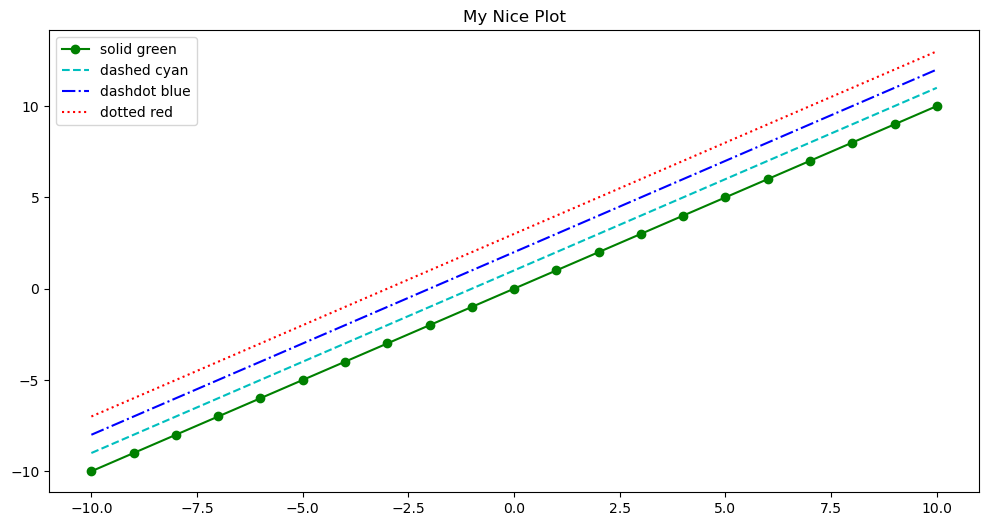

In [6]:
fig, axes = plt.subplots(figsize=(12, 6))

axes.plot(x, x + 0, '-og', label="solid green")
axes.plot(x, x + 1, '--c', label="dashed cyan")
axes.plot(x, x + 2, '-.b', label="dashdot blue")
axes.plot(x, x + 3, ':r', label="dotted red")

axes.set_title("My Nice Plot")
axes.legend()

### Multi-axis Figures (Sub-figures)

`plt.subplot()` returns a (figure, axis) tuple.

(<Figure size 640x480 with 1 Axes>, <Axes: >)

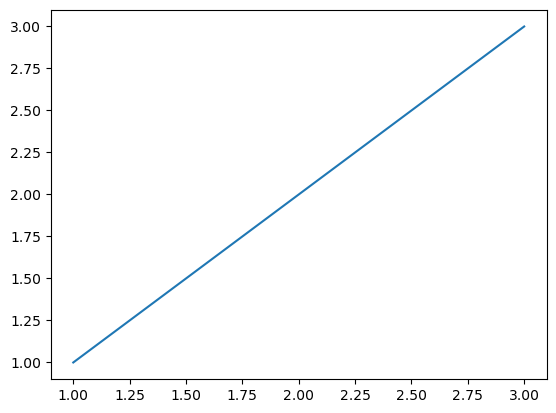

In [7]:
plot_objects = plt.subplots()

(fig, ax) = plot_objects

ax.plot([1,2,3], [1,2,3])  # f(x) = x

plot_objects

To make a figure w/ 4 axes, just define how many rows & columns of axes you'd like

(<Figure size 1400x600 with 4 Axes>,
 array([[<Axes: >, <Axes: >],
        [<Axes: >, <Axes: >]], dtype=object))

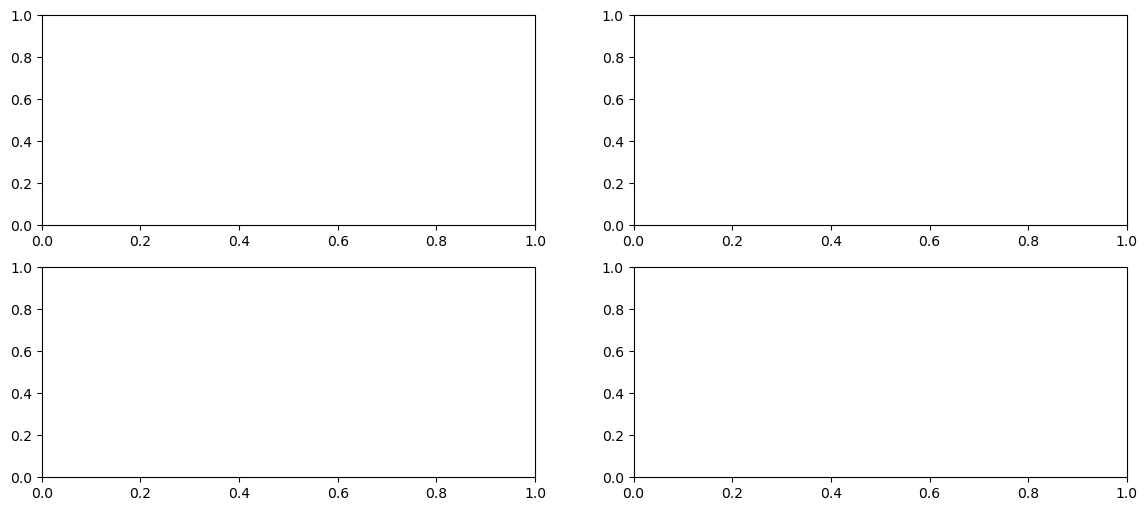

In [8]:
# make a figure w/ 4 axes arranged in a 2x2 grid
plot_objects = plt.subplots(nrows=2, ncols=2, figsize=(14, 6))

(fig, ((ax1, ax2), (ax3, ax4))) = plot_objects

plot_objects

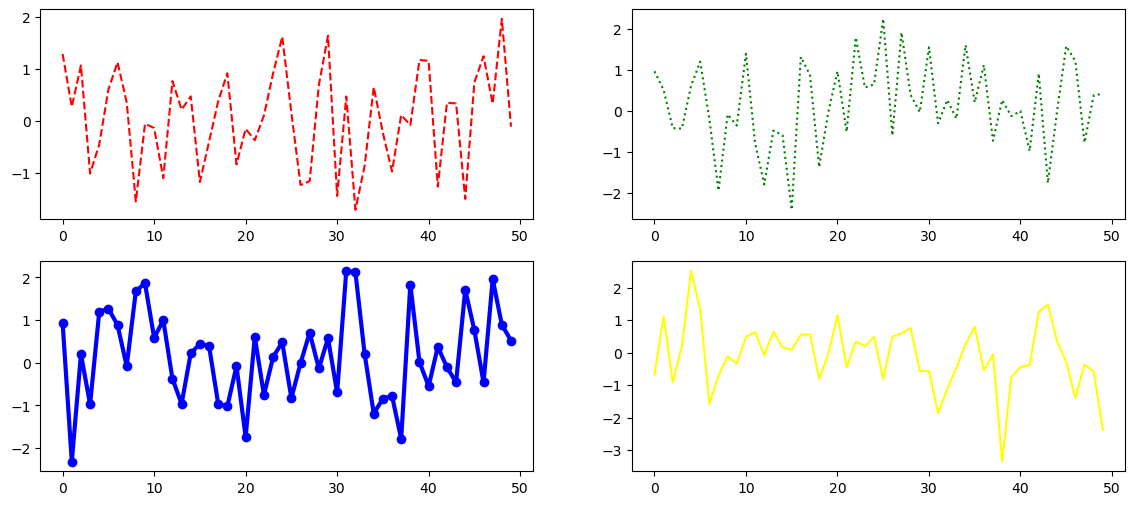

In [9]:
# order doesn't matter, still plot the data line on the right axis.
ax4.plot(np.random.randn(50), c='yellow')
ax1.plot(np.random.randn(50), c='red', linestyle='--')
ax2.plot(np.random.randn(50), c='green', linestyle=':')
ax3.plot(np.random.randn(50), c='blue', marker='o', linewidth=3.0)

fig

Axes can also be made not in an equal-sized grid:

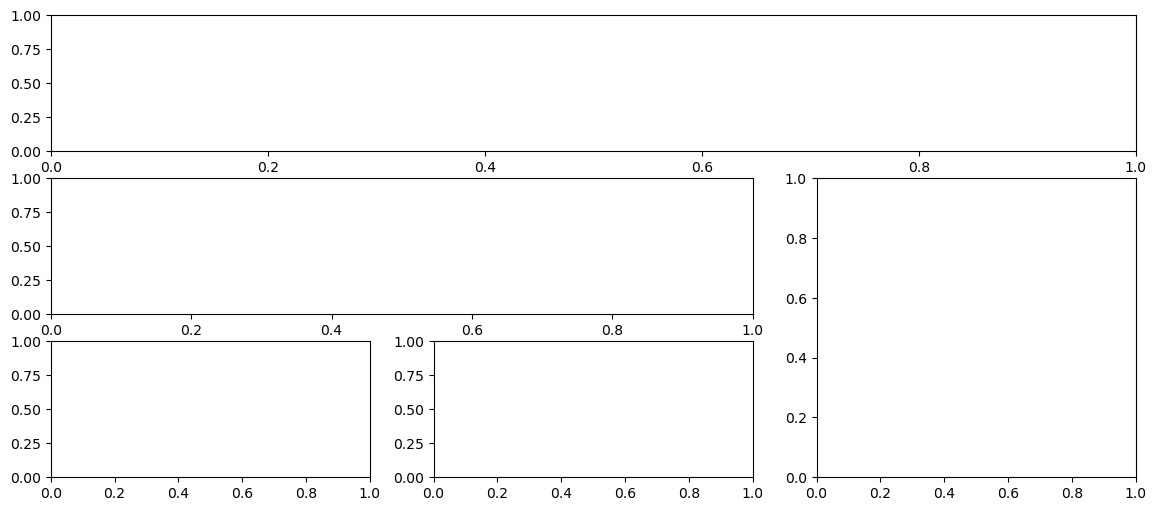

In [10]:
plt.figure(figsize=(14, 6))

ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,3), (1,2), rowspan=2)
ax4 = plt.subplot2grid((3,3), (2,0))
ax5 = plt.subplot2grid((3,3), (2,1))

### Scatterplots

full cmap options available: https://matplotlib.org/users/colormaps.html

In [11]:
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (20 * np.random.rand(N))**2  # 0 to 15 point radii

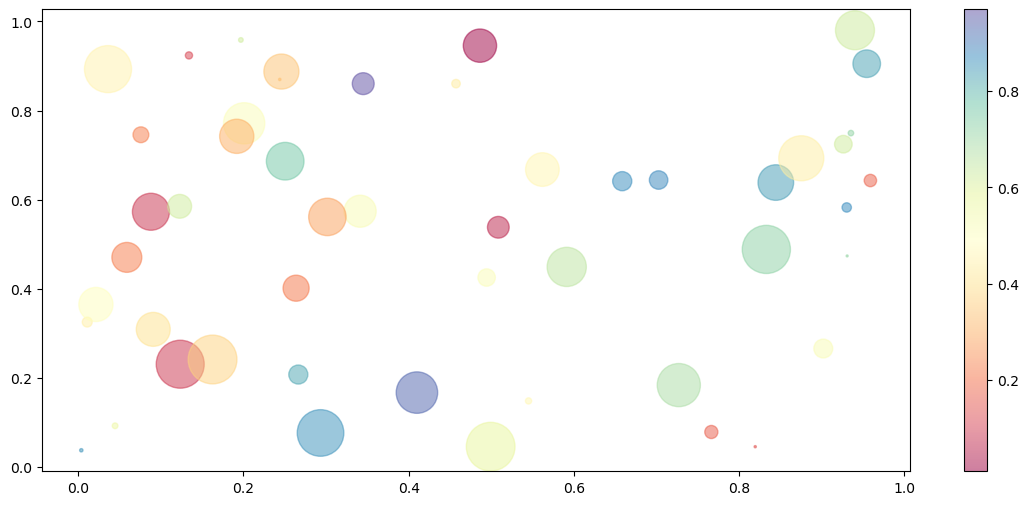

In [12]:
plt.figure(figsize=(14, 6))

plt.scatter(x, y, s=area, c=colors, alpha=0.5, cmap='Spectral')
plt.colorbar()

plt.show()

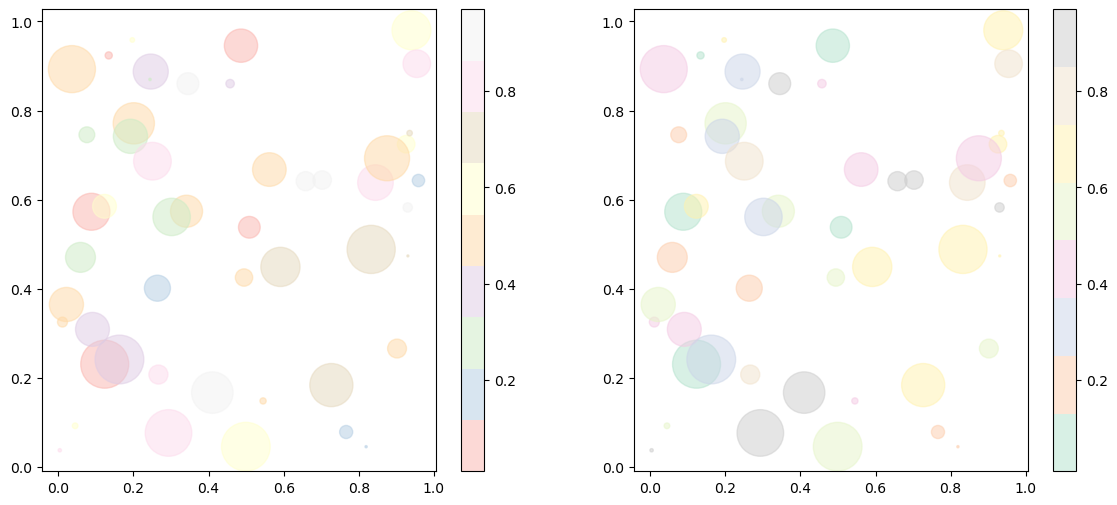

In [13]:
fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(1,2,1)
plt.scatter(x, y, s=area, c=colors, alpha=0.5, cmap='Pastel1')
plt.colorbar()

ax2 = fig.add_subplot(1,2,2)
plt.scatter(x, y, s=area, c=colors, alpha=0.5, cmap='Pastel2')
plt.colorbar()

plt.show()

### Histograms

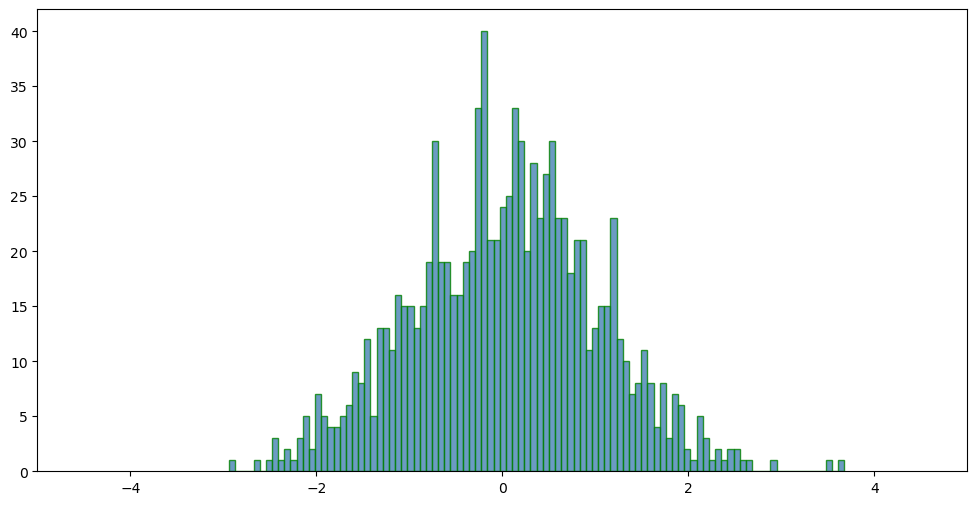

In [14]:
values = np.random.randn(1000)

plt.subplots(figsize=(12, 6))

plt.hist(values, bins=100, alpha=0.8,
          histtype='bar', color='steelblue',
          edgecolor='green')
plt.xlim(xmin=-5, xmax=5)

plt.show()

**Can save file as .png via** `fig.savefig('hist.png')`

### Kernel Density Estimation (KDE)

Like a histogram, but makes a continuous distribution.

In [15]:
from scipy import stats

density = stats.kde.gaussian_kde(values)

plt.subplots(figsize=(12, 6))

values2 = np.linspace(min(values)-10, max(values)+10, 100)

plt.plot(values2, density(values2), color='#FF7F00')
plt.fill_between(values2, 0, density(values2), alpha=0.5, color='#FF7F00')
plt.xlim(xmin=-5, xmax=5)

plt.show()

ModuleNotFoundError: No module named 'scipy'

### Combining Plots

KDE outline overlaid onto histogram

In [ ]:
plt.subplots(figsize=(12, 6))

plt.hist(values, bins=100, alpha=0.8, density=1,
          histtype='bar', color='steelblue',
          edgecolor='green')

plt.plot(values2, density(values2), color='#FF7F00', linewidth=3.0)
plt.xlim(xmin=-5, xmax=5)

plt.show()

### Bar Graphs

In [ ]:
Y = np.random.rand(1, 5)[0]
Y2 = np.random.rand(1, 5)[0]

plt.figure(figsize=(12, 4))

barWidth = 0.5
plt.bar(np.arange(len(Y)), Y, width=barWidth, color='#00b894')

plt.show()

#### Stacked Bar Graphs

In [ ]:
plt.figure(figsize=(12, 4))

barWidth = 0.5
plt.bar(np.arange(len(Y)), Y, width=barWidth, color='#00b894', label='Label Y')
plt.bar(np.arange(len(Y2)), Y2, width=barWidth, color='#e17055', bottom=Y, label='Label Y2')

plt.legend()
plt.show()

### Boxplots (Outliers)

In [ ]:
values = np.concatenate(
    [np.random.randn(10), np.array([10, 15, -10, -15])])

plt.figure(figsize=(12, 4))

plt.hist(values)

In [ ]:
plt.figure(figsize=(12, 4))

plt.boxplot(values)